# Accidents/Vehicles merged preprocessing


### Process flow

1. import packages
2. Load and merge Vehicles and Accident datasets
3. save enriched data for downstream use
4. reload preprocessed data and check details
5. Data assessment
   -- fields
   -- time dependencies

### Input data

* **Accidents dataset** : from RS_DS_Accidents 
* **Vehicles datasets** : from RS_DS_Vehicles

### Output data

* 'RTA_unfiltered.pickle' : full dataset from merger prior to filtering
* 'RTA_filtered.pickle' : **Merged dataset**
* saved data assessment plot (.png) snapshots

## Import external libraries

In [1]:
'''
Initialisation
* Import packages
* Initialise data
'''
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
%matplotlib inline

## 'Import' RTAUtilities

In [2]:
'''
Provide output of csv and pickle formats for DataFrames
'''
def pick_and_csv(df, path, filename):
    import sys
    try:
        df.to_csv(path + filename + '.csv', index=False)
        df.to_pickle(path + filename + '.pickle')
    except IOError as (errno, strerror):
        print ('I/O error({0}): {1}'.format(errno, strerror))
        if errno == 13:
            print ('*** check to see if (someone has) file already open ***')
        elif errno == 2:
            print ('Directory parameter needs to be a valid directory')
    except:
        print ("Unexpected error:", sys.exc_info()[0])
        print ('*** is first parameter a DataFrame? ***')
        raise

## Load Merged data and create dataset

In [3]:
'''
Load datasets & generate DataFrames
'''
start_time0 = time.time()

#cameras_csv_file = "Data/Speed_cameras.csv"

Vehicles = pd.read_pickle('Data/Vehicles.pickle')
Accidents = pd.read_pickle('Data/Accidents.pickle')
#Casualties = pd.read_pickle('Data/Casualties.pickle')

# Generate RTA 'Merged' DataFrame
df_RTA = Accidents.merge(Vehicles, on=['accident_index'], how = 'right')

###df_RTC = df_RTA.merge(Casualties, on=['accident_index','vehicle_reference'], how = 'left').fillna(0)

_ = pick_and_csv(df_RTA, 'Data/', 'RTA_unfiltered')

print ("Merged dataload from upstream datasets: %s seconds " % (time.time() - start_time0))

Merged dataload from upstream datasets: 13.8680000305 seconds 


In [4]:
df_RTA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257845 entries, 0 to 257844
Data columns (total 57 columns):
accident_index                                 257845 non-null object
location_easting_osgr                          257792 non-null float64
location_northing_osgr                         257792 non-null float64
longitude                                      257792 non-null float64
latitude                                       257792 non-null float64
police_force                                   257792 non-null float64
accident_severity                              257792 non-null float64
number_of_vehicles                             257792 non-null float64
number_of_casualties                           257792 non-null float64
date                                           257792 non-null object
day_of_week                                    257792 non-null float64
time                                           257759 non-null object
local_authority_(district)              

In [5]:
'''
Filter data
'''
start_time0 = time.time()

df_RTA_filter = df_RTA[df_RTA['age_of_vehicle'] != -1]
df_RTA_filter = df_RTA_filter[df_RTA_filter['age_of_driver'] != -1]
###df_RTA_filter = df_RTA_filter[(df_RTA_filter['vehicle_type'] == 8) | (df_RTA_filter['vehicle_type'] == 9)] #cars only

_ = pick_and_csv(df_RTA_filter, 'Data/', 'RTA_filtered')

print ("Filtered merged data: %s seconds " % (time.time() - start_time0))

Filtered merged data: 10.1349999905 seconds 


## Data assessment

In [6]:
df_RTA = pd.read_pickle('Data/RTA_filtered.pickle') 

#Assess unfiltered data
#df_RTA = pd.read_pickle('Data/df_RTA_unfiltered.pickle') #Assess filtered data
#df_RTA_filter = df_RTA_filter[(df_RTA_filter['vehicle_type'] == 8) | (df_RTA_filter['vehicle_type'] == 9)] #cars only
#df_RTA_filter = df_RTA_filter[(df_RTA_filter['vehicle_type']  8) | (df_RTA_filter['vehicle_type'] == 9)] #mbikes only
#df_RTA = df_RTA[(df_RTA['vehicle_type'] == 1)]  #pbikes only
df_RTA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162805 entries, 2 to 257844
Data columns (total 57 columns):
accident_index                                 162805 non-null object
location_easting_osgr                          162781 non-null float64
location_northing_osgr                         162781 non-null float64
longitude                                      162781 non-null float64
latitude                                       162781 non-null float64
police_force                                   162781 non-null float64
accident_severity                              162781 non-null float64
number_of_vehicles                             162781 non-null float64
number_of_casualties                           162781 non-null float64
date                                           162781 non-null object
day_of_week                                    162781 non-null float64
time                                           162764 non-null object
local_authority_(district)              

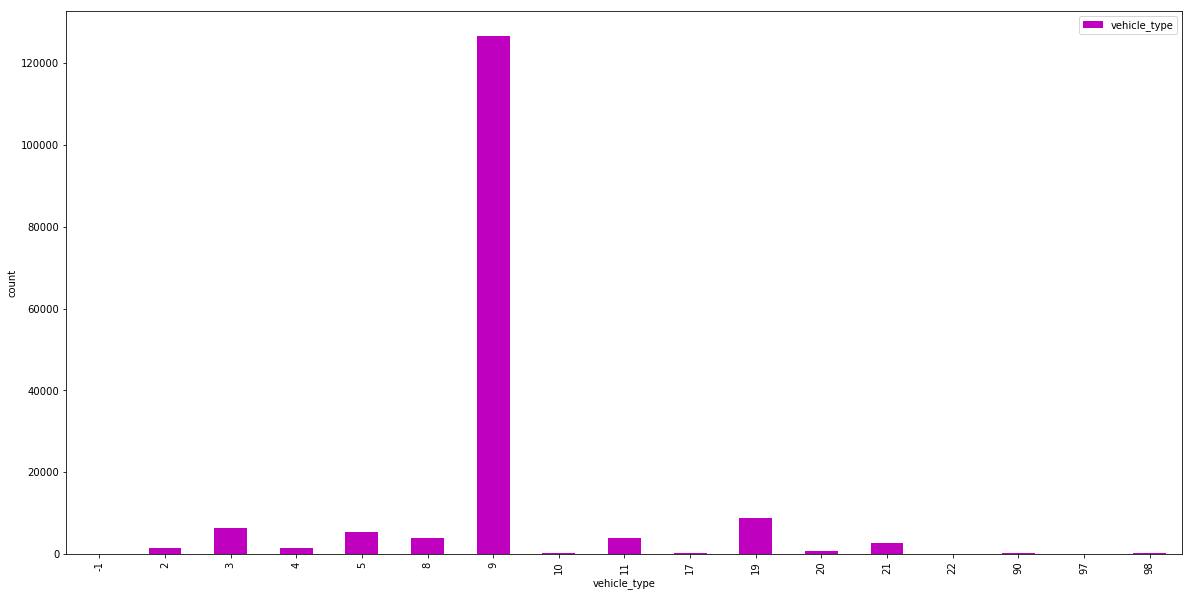

In [7]:
# check data
col = 'vehicle_type'

plt.figure(figsize=(20,10))
df_RTA.groupby([col])[col].count().plot(kind='bar', color='m',legend=True)
plt.ylabel('count')
plt.savefig('Data/Pics/Merged_Bar_'+col+'.png')
plt.show()

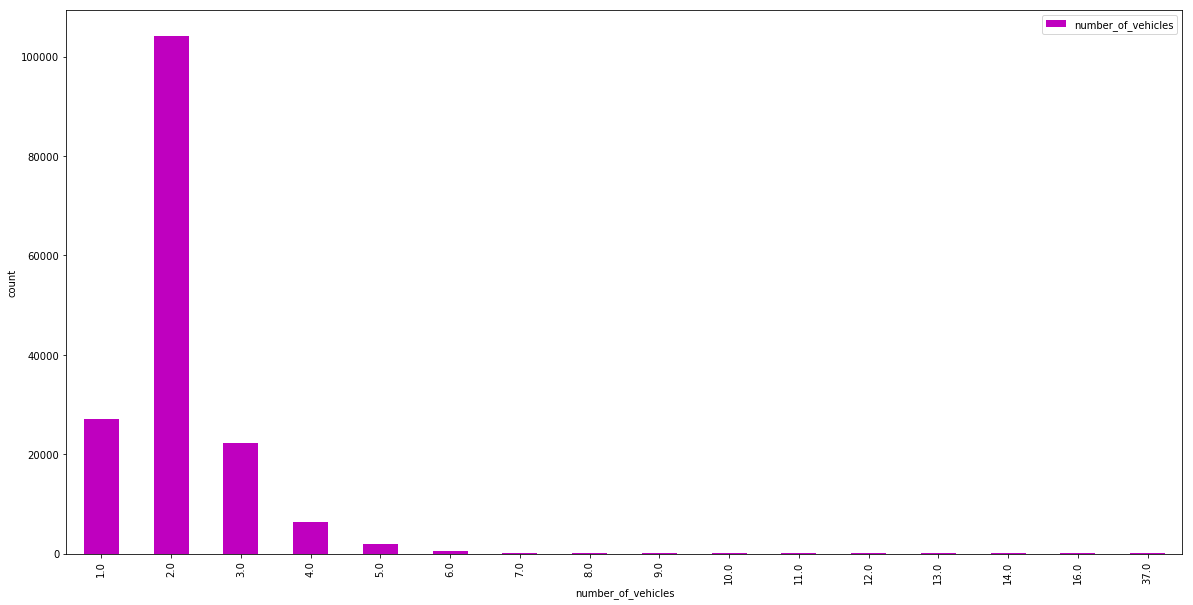

In [8]:
# check data
col = 'number_of_vehicles'

kind = 'Bar'
plt.figure(figsize=(20,10))
df_RTA.groupby([col])[col].count().plot(kind=kind, color='m',legend=True)
plt.ylabel('count')
plt.savefig('Data/Pics/df_RTA_' + col + '_' + kind + '.png')
plt.show()

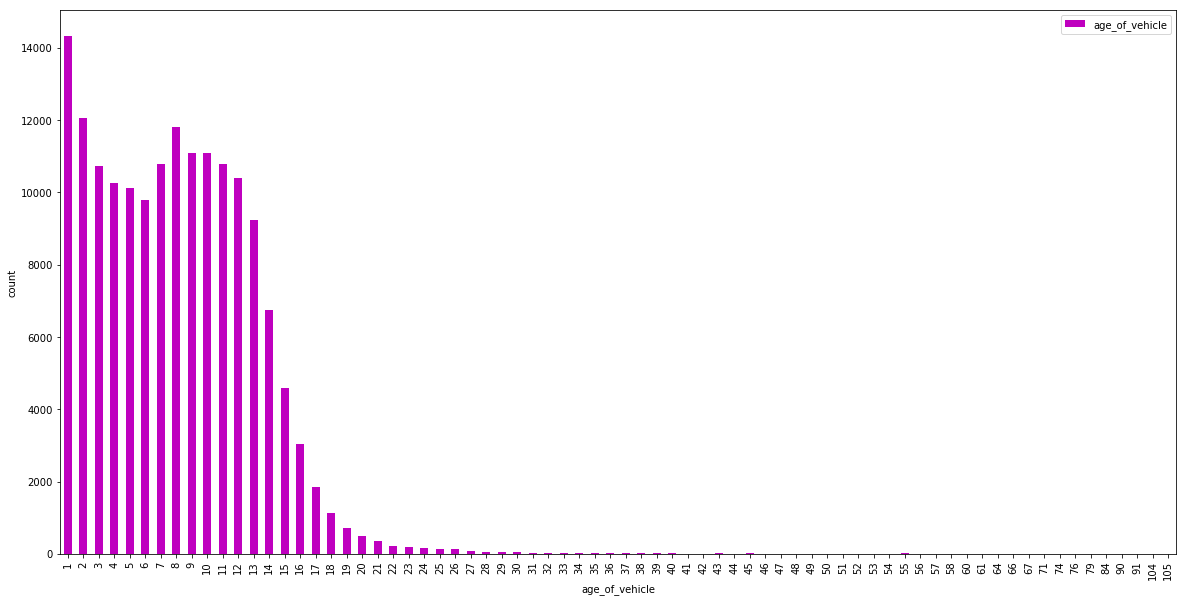

In [9]:
# check data
col = 'age_of_vehicle'

kind = 'Bar'
plt.figure(figsize=(20,10))
df_RTA.groupby([col])[col].count().plot(kind=kind, color='m',legend=True)
plt.ylabel('count')
plt.savefig('Data/Pics/df_RTA_' + col + '_' + kind + '.png')
plt.show()

130304


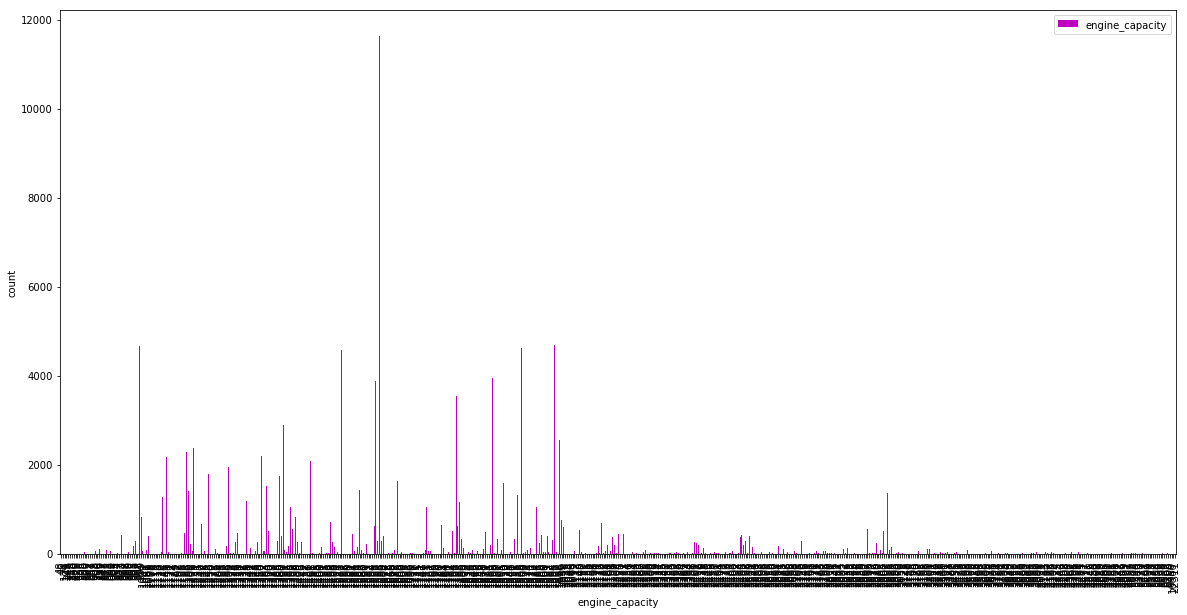

In [10]:
# check data
col = 'engine_capacity'

kind = 'Bar'
plt.figure(figsize=(20,10))
df_RTA_filter = df_RTA[(df_RTA['engine_capacity'] != -1)]
df_RTA_filter = df_RTA_filter[df_RTA_filter['age_of_vehicle'] != -1]
df_RTA_filter = df_RTA_filter[df_RTA_filter['age_of_driver'] != -1]
df_RTA_filter = df_RTA_filter[(df_RTA_filter['vehicle_type'] == 8) | (df_RTA_filter['vehicle_type'] == 9)]
#print df_RTA_filter[df_RTA_filter['latitude'] == 0]
print df_RTA_filter[col].count()
df_RTA_filter.groupby([col])[col].count().plot(kind=kind, color='m',legend=True)
plt.ylabel('count')
plt.savefig('Data/Pics/df_RTA_' + col + '_' + kind + '.png')
plt.show()

162781


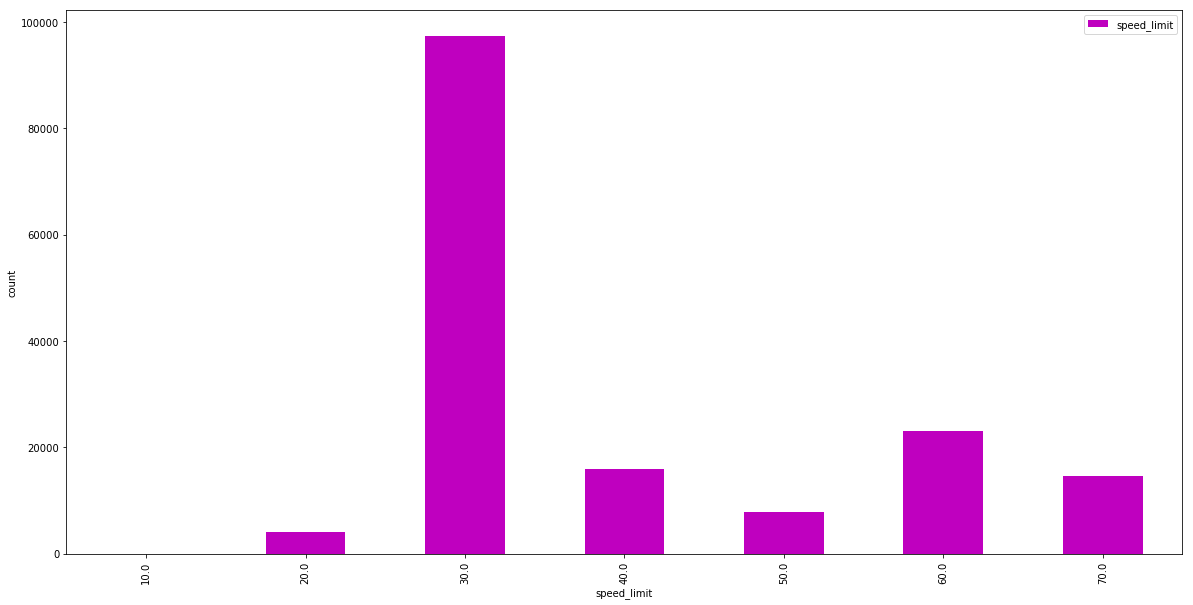

In [11]:
# check data
col = 'speed_limit'

kind = 'Bar'
plt.figure(figsize=(20,10))
df_RTA_filter = df_RTA[(df_RTA[col] != -1)]
df_RTA_filter = df_RTA_filter[df_RTA_filter['age_of_driver'] != -1]
print df_RTA_filter[col].count()
df_RTA_filter.groupby([col])[col].count().plot(kind=kind, color='m',legend=True)
plt.ylabel('count')
plt.savefig('Data/Pics/df_RTA_' + col + '_' + kind + '.png')
plt.show()

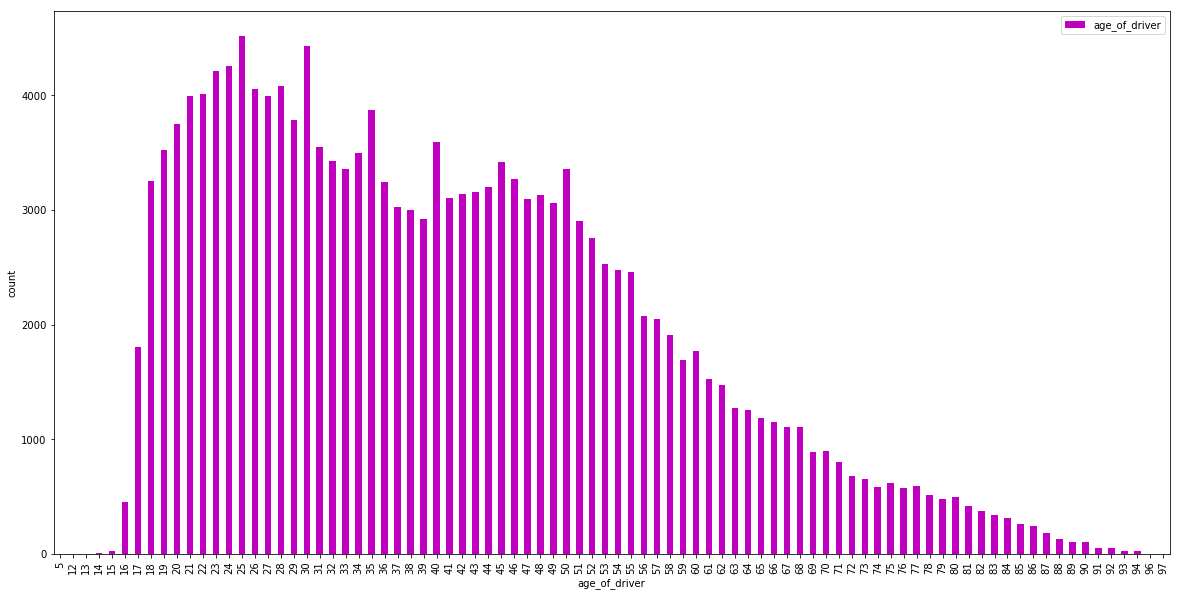

In [12]:
# check data
col = 'age_of_driver'

kind = 'Bar'
plt.figure(figsize=(20,10))
df_RTA_filter = df_RTA[df_RTA[col] != -1]
df_RTA_filter.groupby([col])[col].count().plot(kind=kind, color='m',legend=True)
plt.ylabel('count')
plt.show()

## Time dependecies

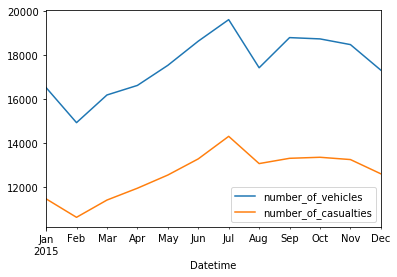

,number_of_vehicles,number_of_casualties
Datetime,,
2015-01-31,16507.0,11446.0
2015-02-28,14912.0,10606.0
2015-03-31,16170.0,11391.0
2015-04-30,16605.0,11929.0
2015-05-31,17518.0,12529.0
2015-06-30,18618.0,13264.0
2015-07-31,19597.0,14289.0
2015-08-31,17408.0,13050.0
2015-09-30,18780.0,13290.0


In [13]:
'''
Convert Datetime and determine any time series information
'''

format = '%d/%m/%Y %H:%M:%S'
df_RTA['Datetime'] = pd.to_datetime(df_RTA['date'] + ' ' + df_RTA['time'] + ':00', format = format)
df = df_RTA.set_index(pd.DatetimeIndex(df_RTA.Datetime))
stats = df[['accident_index', 'number_of_vehicles', 'number_of_casualties']].copy().drop_duplicates()
s = stats.resample('M').sum()
p = s.loc['2015', ['number_of_vehicles','number_of_casualties']].plot()
plt.show()
s

In [14]:
'''
Road Accident filtered Scenarios (currently manually changed)
'''

def Road_scenarios(df,R):
    return df[(
        (
            ((df.first_road_class == 1) & (df.first_road_number == 25 ))
            | ((df.first_road_class == 3) & (df.first_road_number == 282))
        ) 
        #&
        #(df.accident_severity <= 100) & 
        #(df.speed_limit < 100) &
        #& (df.sex_of_driver == 1)
    )]

Road = 'M25'

df_RTA_Road = Road_scenarios(df_RTA,Road)


In [15]:
df_RTA_Road.head()

,accident_index,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type,vehicle_imd_decile,Datetime
11728,201501ID60072,503800.0,175410.0,-0.507036,51.468148,1.0,3.0,2.0,1.0,07/08/2015,...,2,20,4,1995,2,4,-1,1,-1,2015-08-07 16:55:00
11729,201501ID60072,503800.0,175410.0,-0.507036,51.468148,1.0,3.0,2.0,1.0,07/08/2015,...,1,39,7,1968,2,1,-1,1,-1,2015-08-07 16:55:00
14335,201501KD50051,558080.0,189280.0,0.280073,51.580216,1.0,3.0,2.0,1.0,14/01/2015,...,2,41,7,1461,2,5,-1,1,-1,2015-01-14 17:00:00
14343,201501KD50056,556400.0,192890.0,0.257455,51.613118,1.0,2.0,2.0,1.0,23/01/2015,...,2,45,7,1995,2,8,-1,1,-1,2015-01-23 11:15:00
14477,201501KD50139,556450.0,192800.0,0.258137,51.612295,1.0,3.0,2.0,1.0,22/03/2015,...,1,36,7,1998,2,10,-1,-1,-1,2015-03-22 02:21:00


C:\Users\Iain\Anaconda3\envs\GA\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


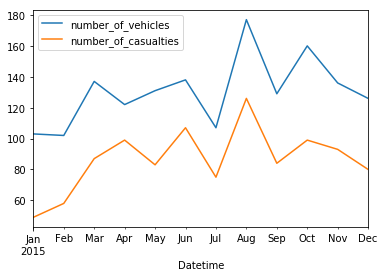

,number_of_vehicles,number_of_casualties
Datetime,,
2015-01-31,103.0,49.0
2015-02-28,102.0,58.0
2015-03-31,137.0,87.0
2015-04-30,122.0,99.0
2015-05-31,131.0,83.0
2015-06-30,138.0,107.0
2015-07-31,107.0,75.0
2015-08-31,177.0,126.0
2015-09-30,129.0,84.0


In [16]:
df_RTA_Road['Datetime'] = pd.to_datetime(df_RTA_Road['date'] + ' ' + df_RTA_Road['time'] + ':00', format = format)
df_RTA_Road = df_RTA_Road.set_index(pd.DatetimeIndex(df_RTA_Road.Datetime))
stats = df_RTA_Road[['accident_index', 'number_of_vehicles', 'number_of_casualties']].copy().drop_duplicates()
s = stats.resample('M').sum()
p = s.loc['2015', ['number_of_vehicles','number_of_casualties']].plot()
plt.show()
s

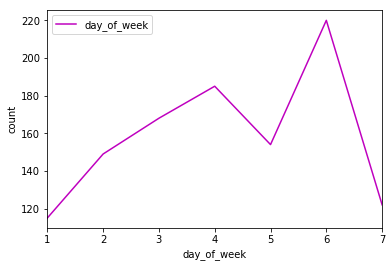

In [17]:
'''
Bar chart of checking (pre-plot) data
'''
col = 'day_of_week'
df_RTA_Road.groupby([col])[col].count().plot(kind='Line', color='m',legend=True)
plt.ylabel('count')
plt.savefig('Data/Pics/' + Road + '_Line_'+col+'.png')
plt.show()
df_RTA_Road.head()

plt.show()